In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import matplotlib.colors as mcolors
import seaborn as sns
mycolor = np.array(list(mcolors.BASE_COLORS.keys()))
print(nx.__version__)

3.1


In [2]:
df = pd.read_csv('karate.txt', sep=',')
df.head()

,fromPersonId,toPersonId
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [4]:
#changibg the name of columns
df.rename(columns={'fromPersonId':'source', 'toPersonId':'target'}, inplace=True)
df.head()

,source,target
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [ ]:
#converting the dataframe to a graph
G1= nx.from_pandas_edgelist(df, 'source', 'target')
G1 = G1.to_undirected() #to make sure that the graph is undirected

In [ ]:
print(G1) #printing the information of the graph

Graph with 34 nodes and 77 edges


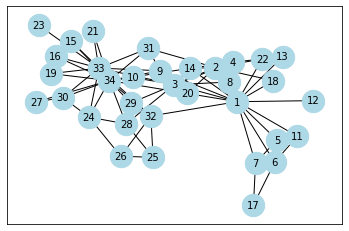

In [ ]:
nx.draw_networkx(G1, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_color='black')

In [11]:
#The number of subgraphs
print(nx.number_connected_components(G1))

1


In [ ]:
#identify largest connected component
Gcc = sorted(nx.connected_components(G1), key=len, reverse=True) #sorting the connected components
G0 = G1.subgraph(Gcc[0]) #selecting the largest connected component
print(G0)

Graph with 34 nodes and 77 edges


[ 1  2  3  4  5  6  9 10 12 16]
[ 2 10  6  6  3  2  1  1  1  2]


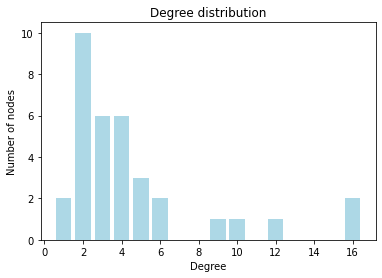

In [14]:
degrees = [G0.degree(n) for n in G0.nodes()] #calculating the degree of each node
degreen , degreecount = np.unique(degrees, return_counts=True) #counting the number of nodes with the same degree
print(degreen)
print(degreecount)

plt.bar(degreen, degreecount, color='lightblue')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution')
plt.show()


In [ ]:
#compute the local clustering coefficient for all nodes
#the more they are closer to 1, the more connection they have
clustering = nx.clustering(G0)
print(clustering)

{1: 0.15, 2: 0.3333333333333333, 3: 0.24444444444444444, 4: 0.6666666666666666, 5: 0.6666666666666666, 6: 0.5, 7: 0.5, 8: 1.0, 9: 0.5, 11: 0.6666666666666666, 12: 0, 13: 1.0, 14: 0.6, 18: 1.0, 20: 0.3333333333333333, 22: 1.0, 32: 0.2, 31: 0.5, 10: 0, 28: 0.16666666666666666, 29: 0.3333333333333333, 33: 0.18181818181818182, 17: 1.0, 34: 0.11666666666666667, 15: 1.0, 16: 1.0, 19: 1.0, 21: 1.0, 23: 0, 24: 0.4, 26: 0.3333333333333333, 30: 0.6666666666666666, 25: 0.3333333333333333, 27: 1.0}


In [17]:
#
clustering2 = list(clustering.items())
clustering2.sort(key=lambda x: x[1], reverse=True)
clustering2

[(8, 1.0),
 (13, 1.0),
 (18, 1.0),
 (22, 1.0),
 (17, 1.0),
 (15, 1.0),
 (16, 1.0),
 (19, 1.0),
 (21, 1.0),
 (27, 1.0),
 (4, 0.6666666666666666),
 (5, 0.6666666666666666),
 (11, 0.6666666666666666),
 (30, 0.6666666666666666),
 (14, 0.6),
 (6, 0.5),
 (7, 0.5),
 (9, 0.5),
 (31, 0.5),
 (24, 0.4),
 (2, 0.3333333333333333),
 (20, 0.3333333333333333),
 (29, 0.3333333333333333),
 (26, 0.3333333333333333),
 (25, 0.3333333333333333),
 (3, 0.24444444444444444),
 (32, 0.2),
 (33, 0.18181818181818182),
 (28, 0.16666666666666666),
 (1, 0.15),
 (34, 0.11666666666666667),
 (12, 0),
 (10, 0),
 (23, 0)]

In [ ]:
#compute the average clustering coefficient
#the more they are closer to 1, the more connection they have
nx.average_clustering(G0)

0.5409685086155674

In [ ]:
#second way
np.mean(list(clustering.values()))

0.5409685086155674

In [20]:
print(nx.diameter(G0)) #the longest shortest path

5


In [21]:
print(nx.average_shortest_path_length(G0)) #the average shortest path

2.4206773618538326
